In [1]:
from IPython.display import clear_output
import torch
from my_snn.rsnn import *
from my_snn.rsnn_delays import RSNN_d_d
from my_snn.utils import train, training_plots, ModelLoader
from my_snn.tonic_dataloader import DatasetLoader
import matplotlib.pyplot as plt 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print ('Running on: {}'.format(device))

C:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


## SHD50

In [2]:
dataset = 'shd'
time_window = 50
batch_size = 256 # lr=1e-4
#batch_size = 128 # lr=1e-4
DL = DatasetLoader(dataset=dataset, caching='memory', num_workers=0, batch_size=batch_size, time_window=time_window)
data = DL.get_dataloaders()
ckpt_dir = 'other-tests'

## 84% achieved with 2l using mg-mot and separate lr 

In [4]:
# training configuration
num_hidden = 128
snn = RSNN_2l_ALIF(dataset, num_hidden=num_hidden, thresh=0.3, tau_m='adp', win=time_window, surr='mg', loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-2, 50, ckpt_dir=ckpt_dir)

RSNN_2l_ALIF(
  (criterion): CrossEntropyLoss()
  (fc_ih): Linear(in_features=700, out_features=128, bias=False)
  (fc_h1h1): Linear(in_features=128, out_features=128, bias=False)
  (fc_h1h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_h2h2): Linear(in_features=128, out_features=128, bias=False)
  (fc_ho): Linear(in_features=128, out_features=20, bias=False)
)
Total params: 141312
Total mult-adds (M): 7.0656
training shd50_RSNN_2l_ALIF_128.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 7.554006099700928
Epoch [2/50]
Time elasped: 7.699467420578003
Epoch [3/50]
Time elasped: 7.703923463821411
Epoch [4/50]
Time elasped: 7.618574857711792
Epoch [5/50]
Time elasped: 7.6635284423828125
Test Loss: 8.758369962102734
Avg spk_count per neuron for all 50 timesteps 4.972318649291992
Test Accuracy of the model on the test samples: 74.854
Saving max acc model
Epoch [6/50]
Time elasped: 7.630022764205933
Epoch [7/50]
Time elasped: 7.75056529045105
Epoch [8/50]
Time elasped: 7.643003

instance of <class 'my_snn.rsnn.RSNN_2l_ALIF'> loaded sucessfully
shd50_RSNN_2l_ALIF_128.t7 max acc: 84.27734375


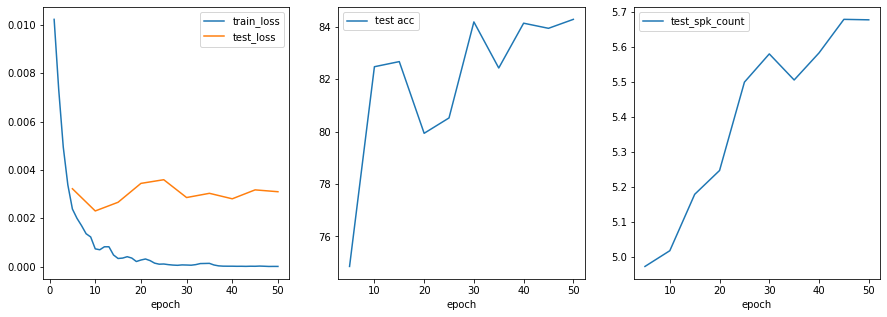

In [5]:
snn = ModelLoader('shd50_RSNN_2l_ALIF_128.t7', 'other-tests', 256, device)
training_plots(snn, figsize = (15,5))

## 88% achieved with less parameters (delays)

In [9]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-3, 50, ckpt_dir=ckpt_dir)

delays: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
RSNN_d_d(
  (criterion): CrossEntropyLoss()
  (f0_i): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): Linear(in_features=960, out_features=64, bias=False)
  (f2_o): Linear(in_features=960, out_features=20, bias=False)
)
Total params: 125440
Total mult-adds (M): 6.272
training shd50_RSNN_d_d_2l64_30d2.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 41.98436665534973
Epoch [2/50]
Time elasped: 9.624589681625366
Epoch [3/50]
Time elasped: 8.569576740264893
Epoch [4/50]
Time elasped: 8.27507495880127
Epoch [5/50]
Time elasped: 8.215041399002075
Test Loss: 3.7573181214975193
Avg spk_count per neuron for all 50 timesteps 9.775619506835938
Test Accuracy of the model on the test samples: 88.428
Saving max acc model
Epoch [6/50]
Time elasped: 8.36566972732544
Epoch [7/50]
Time elasped: 8.467363834381104
Epoch [8/50]
Time elasped: 8.458861589431763
Epoch [9/50]
Time elasped: 8.44710898399353
Epoch [10/50]
Time elasped

shd50_RSNN_d_d_2l64_30d2.t7 max acc: 88.427734375


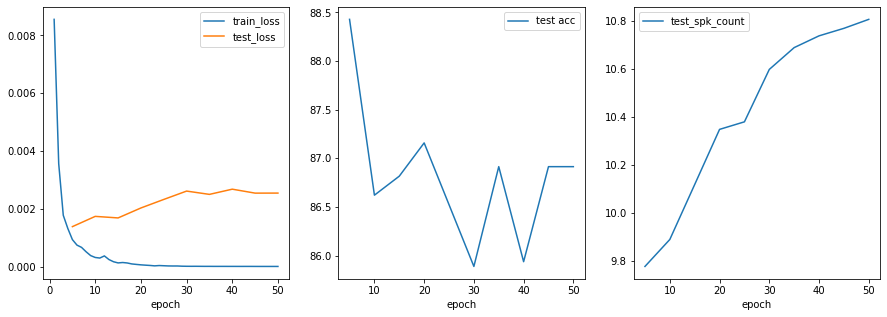

In [11]:
training_plots(snn, figsize = (15,5))

## 87% same as previous but size 128

In [12]:
hidden = (128, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-3, 50, ckpt_dir=ckpt_dir)

delays: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
RSNN_d_d(
  (criterion): CrossEntropyLoss()
  (f0_i): Linear(in_features=700, out_features=128, bias=False)
  (f1_f2): Linear(in_features=1920, out_features=128, bias=False)
  (f2_o): Linear(in_features=1920, out_features=20, bias=False)
)
Total params: 373760
Total mult-adds (M): 18.688
training shd50_RSNN_d_d_2l128_30d2.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 8.45504355430603
Epoch [2/50]
Time elasped: 8.448930978775024
Epoch [3/50]
Time elasped: 8.438064098358154
Epoch [4/50]
Time elasped: 8.475819110870361
Epoch [5/50]
Time elasped: 8.378520011901855
Test Loss: 7.3836528764804825
Avg spk_count per neuron for all 50 timesteps 7.658588409423828
Test Accuracy of the model on the test samples: 82.520
Saving max acc model
Epoch [6/50]
Time elasped: 8.352001190185547
Epoch [7/50]
Time elasped: 8.202595233917236
Epoch [8/50]
Time elasped: 8.229555130004883
Epoch [9/50]
Time elasped: 8.096359968185425
Epoch [10/50]
Time

shd50_RSNN_d_d_2l128_30d2.t7 max acc: 87.451171875


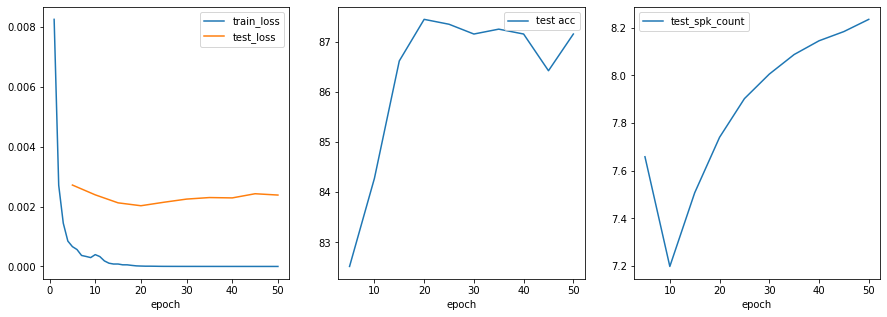

In [13]:
training_plots(snn, figsize = (15,5))

In [ ]:
hidden = (128, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-3, 50, ckpt_dir=ckpt_dir)

## lr = 1e-4 (88,4->85,7%)

In [6]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir)

delays: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
RSNN_d_d(
  (criterion): CrossEntropyLoss()
  (f0_i): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): Linear(in_features=960, out_features=64, bias=False)
  (f2_o): Linear(in_features=960, out_features=20, bias=False)
)
Total params: 125440
Total mult-adds (M): 6.272
training shd50_RSNN_d_d_2l64_30d2.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 6.0518763065338135
Epoch [2/50]
Time elasped: 7.353849411010742
Epoch [3/50]
Time elasped: 7.84587025642395
Epoch [4/50]
Time elasped: 7.883643865585327
Epoch [5/50]
Time elasped: 7.7051427364349365
Test Loss: 9.534016215591691
Avg spk_count per neuron for all 50 timesteps 13.505287170410156
Test Accuracy of the model on the test samples: 73.340
Saving max acc model
Epoch [6/50]
Time elasped: 7.87843132019043
Epoch [7/50]
Time elasped: 7.744668960571289
Epoch [8/50]
Time elasped: 7.7668962478637695
Epoch [9/50]
Time elasped: 7.904604434967041
Epoch [10/50]
Time ela

shd50_RSNN_d_d_2l64_30d2.t7 max acc: 85.7421875


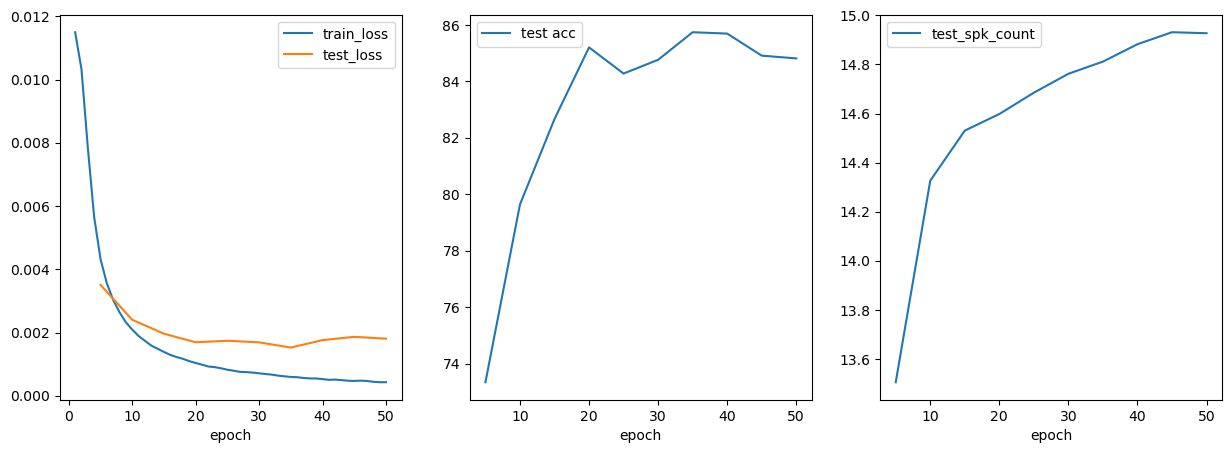

In [7]:
training_plots(snn, figsize = (15,5))

## 1 layer (88,4->86,2%)

In [8]:
hidden = (64, 1, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-3, 50, ckpt_dir=ckpt_dir)

delays: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
RSNN_d_d(
  (criterion): CrossEntropyLoss()
  (f0_i): Linear(in_features=700, out_features=64, bias=False)
  (f1_o): Linear(in_features=960, out_features=20, bias=False)
)
Total params: 64000
Total mult-adds (M): 3.2
training shd50_RSNN_d_d_1l64_30d2.t7 for 50 epochs...
Epoch [1/50]
Time elasped: 5.343423128128052
Epoch [2/50]
Time elasped: 5.290638208389282
Epoch [3/50]
Time elasped: 5.222841024398804
Epoch [4/50]
Time elasped: 5.370054483413696
Epoch [5/50]
Time elasped: 5.299118757247925
Test Loss: 5.154226730131389
Avg spk_count per neuron for all 50 timesteps 10.794853210449219
Test Accuracy of the model on the test samples: 84.180
Saving max acc model
Epoch [6/50]
Time elasped: 5.875305891036987
Epoch [7/50]
Time elasped: 5.449842929840088
Epoch [8/50]
Time elasped: 5.402213096618652
Epoch [9/50]
Time elasped: 5.354779958724976
Epoch [10/50]
Time elasped: 5.432179927825928
Test Loss: 5.124396653011597
Avg spk_count p

shd50_RSNN_d_d_1l64_30d2.t7 max acc: 86.279296875


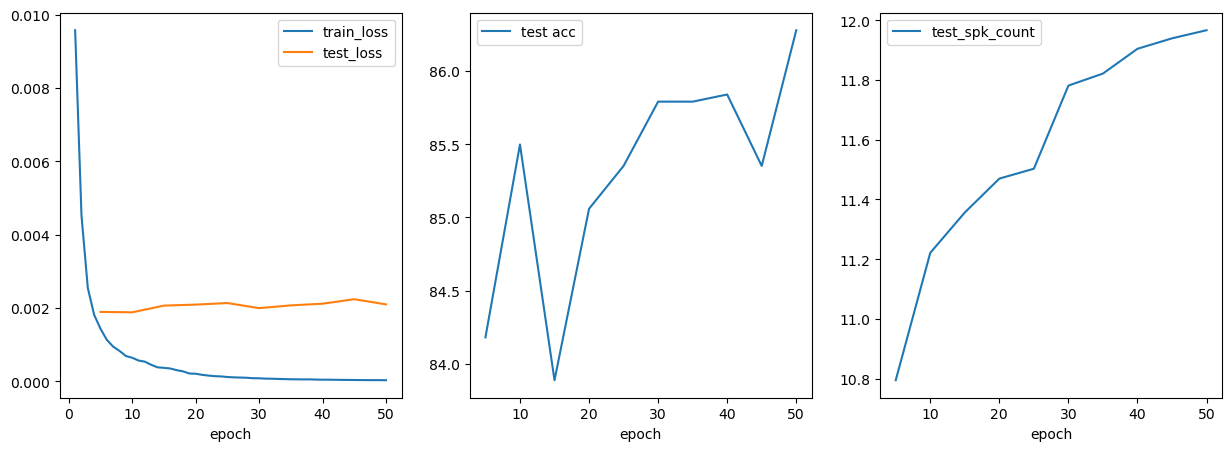

In [9]:
training_plots(snn, figsize = (15,5))

## title

In [ ]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir)

In [ ]:
training_plots(snn, figsize = (15,5))

## title

In [ ]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir)

In [ ]:
training_plots(snn, figsize = (15,5))

## title

In [ ]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir)

In [ ]:
training_plots(snn, figsize = (15,5))

## title

In [ ]:
hidden = (64, 2, 'f')
snn = RSNN_d_d(dataset, hidden=hidden, delay =(30,2), thresh=0.3, tau_m='adp', win=time_window, surr='mg',  loss_fn ='mot', batch_size=256, device=device)
snn.to(device)
train(snn, data, 1e-4, 50, ckpt_dir=ckpt_dir)

In [ ]:
training_plots(snn, figsize = (15,5))